# Credit Card Fraud Detection
### *Semillero Inteligencia Artificial*


**Asesor: Santiago Hincapie**

**Kaggle Datasets**

https://www.kaggle.com/mlg-ulb/creditcardfraud

https://www.kaggle.com/sbhatti/financial-sentiment-analysis

https://www.kaggle.com/andrewmvd/cyberbullying-classification

**Coursera Guides**

https://www.coursera.org/learn/machine-learning

# Credit Card Fraud Detection
Dealing with an Umbalanced Dataset

### Download Data

In [ ]:
! wget https://github.com/coberndorm/SemilleroIA/blob/main/Data.zip?raw=true
! unzip Data.zip?raw=true

--2022-04-24 17:49:42--  https://github.com/coberndorm/SemilleroIA/blob/main/Data.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/coberndorm/SemilleroIA/raw/main/Data.zip [following]
--2022-04-24 17:49:43--  https://github.com/coberndorm/SemilleroIA/raw/main/Data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/coberndorm/SemilleroIA/main/Data.zip [following]
--2022-04-24 17:49:43--  https://raw.githubusercontent.com/coberndorm/SemilleroIA/main/Data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22

In [ ]:
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download mlg-ulb/creditcardfraud
! unzip /content/creditcardfraud.zip

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## Exploratory Data Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler


In [ ]:
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
# Preliminary revision of data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Description of the columns
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# No missing or empty data
df.isna().sum().sum()

0

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# Extremely High Skewedness
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


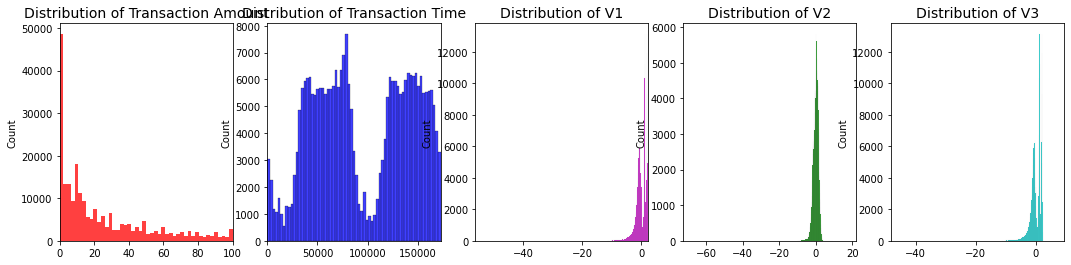

In [ ]:
def Distribution_plot(df):
    amount_val = df['Amount'].values
    time_val = df['Time'].values
    v1_val = df['V1'].values
    v2_val = df['V2'].values
    v3_val = df['V3'].values

    fig, ax = plt.subplots(1, 5, figsize=(18,4))

    sns.histplot(amount_val, ax=ax[0], color='r')
    ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
    ax[0].set_xlim([0, 100])

    sns.histplot(time_val, ax=ax[1], color='b')
    ax[1].set_title('Distribution of Transaction Time', fontsize=14)
    ax[1].set_xlim([min(time_val), max(time_val)])

    sns.histplot(v1_val, ax=ax[2], color='m')
    ax[2].set_title('Distribution of V1', fontsize=14)
    ax[2].set_xlim([min(v1_val), max(v1_val)])

    sns.histplot(v3_val, ax=ax[3], color='g')
    ax[3].set_title('Distribution of V2', fontsize=14)
    ax[3].set_xlim([min(v2_val), max(v2_val)])

    sns.histplot(v1_val, ax=ax[4], color='c')
    ax[4].set_title('Distribution of V3', fontsize=14)
    ax[4].set_xlim([min(v3_val), max(v3_val)])

    plt.show()

Distribution_plot(df)

**Data Scaling**

In [ ]:
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler

Min Max Scaling

In [ ]:
columnames = list(df.columns)
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns = columnames )

In [ ]:
X = scaled_df.loc[:,'Time':'Amount']
y = scaled_df.loc[:,'Class']

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

auc = []
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  method = svm.SVC()
  model = method.fit(X_train,y_train)
  preds = model.predict(X_test)
  fpr, tpr, threshold = metrics.roc_curve(y_test,preds)
  roc_auc = metrics.auc(fpr, tpr)
  auc.append(roc_auc)
print(sum(auc)/10)

KeyboardInterrupt: ignored

**Outlier Detection**

In [ ]:
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

n_columns = df.shape[1]
n_rows = df.shape[0]
p70r = n_columns*0.60
df = df.dropna(axis=0,thresh=p70r)
df = df.fillna(method = 'bfill') 

def mahalanobis_distances(df, axis=0):
    '''
    Returns a pandas Series with Mahalanobis distances for each sample on the
    axis.

    Note: does not work well when # of observations < # of dimensions
    Will either return NaN in answer
    or (in the extreme case) fail with a Singular Matrix LinAlgError

    Args:
        df: pandas DataFrame with columns to run diagnostics on
        axis: 0 to find outlier rows, 1 to find outlier columns
    '''
    df = df.transpose() if axis == 1 else df
    means = df.mean()
    try:
        inv_cov = np.linalg.inv(df.cov())
    except LinAlgError:
        return pd.Series([np.NAN] * len(df.index), df.index,
                         name='Mahalanobis')
    dists = []
    for i, sample in df.iterrows():
        dists.append(mahalanobis(sample, means, inv_cov))

    return pd.Series(dists, df.index, name='Mahalanobis') 
    
mahalanobis = mahalanobis_distances(scaled_df, axis = 0)
df_Mahal = pd.concat([scaled_df,mahalanobis], axis = 1)
df_Mahal

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Mahalanobis
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0,3.417174
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0,3.209530
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0,6.477150
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0,5.121805
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0,4.383160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0.0,17.327714
284803,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0.0,5.378486
284804,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0.0,4.694936
284805,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0.0,6.017917


In [ ]:
cutoff = chi2.ppf(0.95, df_Mahal.shape[1])
outlierIndexes = np.where(df_Mahal.loc[:,'Mahalanobis'] > cutoff )
print(outlierIndexes)
print(df_Mahal.shape[0])
print(df_Mahal.loc[:,'Class'].sum())
indexes_to_keep = set(range(scaled_df.shape[0])) - set(outlierIndexes[0])
df_cutoff = scaled_df.take(list(indexes_to_keep))
print(df_cutoff.loc[:,'Class'].sum())

(array([  1632,   8610,  10456,  10620,  10681,  10690,  10783,  10906,
        12030,  12156,  12229,  12325,  12468,  12922,  12938,  13394,
        13405,  13499,  13617,  13624,  13725,  13833,  13942,  14026,
        14920,  15168,  15364,  16110,  18633,  23128,  24633,  37000,
        39769,  43418,  43432,  44254,  46841,  50287,  54018,  58465,
        63551,  65423,  68454,  74699,  77814,  79267,  79296,  90946,
        91896, 102441, 102442, 102443, 102444, 102445, 102446, 106011,
       108424, 117661, 118764, 121787, 131140, 131480, 138215, 138706,
       139217, 145022, 145090, 150561, 151006, 151007, 151008, 151009,
       151296, 151462, 151519, 152223, 152295, 153823, 153835, 154234,
       154286, 154371, 154587, 154684, 155296, 168402, 169457, 173054,
       173353, 175710, 176335, 184433, 184502, 186714, 188560, 190088,
       195218, 199538, 199710, 199847, 201775, 201869, 206228, 206255,
       210510, 212822, 213160, 213188, 213261, 216065, 217409, 218985,
     

**Undersamplig**

In [ ]:
undersample = NearMiss(version=1)

X = df_cutoff.loc[:,'Time':'Amount']
y = df_cutoff.loc[:,'Class']
X, y = undersample.fit_resample(X, y)

new_df = pd.concat([X,y], axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_df = pd.DataFrame(scaler.fit_transform(new_df),columns = columnames)

In [ ]:
X = new_df.loc[:,'Time':'Amount']
y = new_df.loc[:,'Class']

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

auc = []
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  method = svm.SVC()
  model = method.fit(X_train,y_train)
  preds = model.predict(X_test)
  fpr, tpr, threshold = metrics.roc_curve(y_test,preds)
  roc_auc = metrics.auc(fpr, tpr)
  auc.append(roc_auc)
print(sum(auc)/10)

0.9337527817295938


**Normal Equation** \
Do Normal solution
Check if running it multiple times and taking the average gives a better solution, this works for lineal regression
Analytical solution to theta


In [ ]:
from sklearn import metrics

In [ ]:
def find_theta(X, y):
    
    m = X.shape[0] # Number of training examples. 
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((m,1)), axis=1)    
    # reshaping y to (m,1)
    y = y.reshape(m,1)
    
    # The Normal Equation
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    
    return theta

In [ ]:
def predict_linearRegression(X):
    
    # Appending a cloumn of ones in X to add the bias term.
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    
    # preds is y_hat which is the dot product of X and theta.
    preds = np.dot(X, theta)

    return preds

In [ ]:
# Getting the Value of theta using the find_theta function.
theta = find_theta(X = X.to_numpy(), y = y.to_numpy())

In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df_test = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df_test.loc[df['Class'] == 1]
non_fraud_df = df_test.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df

In [ ]:
X = new_df.loc[:,'Time':'Amount']
y = new_df.loc[:,'Class']

# Getting the predictions on X using the predict function.
preds = predict_linearRegression(X)

fpr, tpr, threshold = metrics.roc_curve(y,preds)

roc_auc = metrics.auc(fpr, tpr)

print(roc_auc)